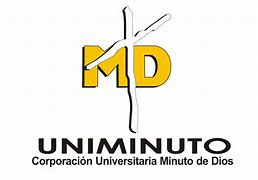

# **Título: Entregable Semana 7**

**Equipo 14:**
--
**Daniel Cadavid Zuleta**
---
**Oscar Yesid Cárdenas Santos**
---
**Saul Andrés Garnica Gutiérrez**
---
**Jorge Armando Serrano Duque**
---
**Michael Andrés Mora**
---
**Materia: Procesamiento Natural Lenguaje NCR-50577**
---
**Semana 7**
---
**Docente: Claudia Marcela Ospina Mosquera**
---
**Fecha de Entrega  16 de Octubre del 2023**

---
**1 .Cargar las Librerias:**

In [1]:
# propósito general
import numpy as np
import matplotlib.pyplot as plt

# creación y entrenamiento del modelo
import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

# ajustes del sistema
import sys
import random
import io

**2. Carga del corpus de trabajo**

In [2]:
# Con la función open de Python se cargará el texto codificado en formato utf8
with open('don_quijote.txt', encoding="utf8") as file:
     # Se define variable para cargar el texto "text" con la función .read y se específica que lo haga en minúsculas
    text = file.read().lower()
# Mostrar primeros 5000 carácteres del texto para su comprobación
print('longuitud del texto', len(text))
print(text[0:5000])

longuitud del texto 2130398
﻿the project gutenberg ebook of don quijote, by miguel de cervantes saavedra

this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online at
www.gutenberg.org. if you are not located in the united states, you
will have to check the laws of the country where you are located before
using this ebook.

title: don quijote

author: miguel de cervantes saavedra

release date: december, 1999 [ebook #2000]
[most recently updated: january 2, 2020]

language: spanish

character set encoding: utf-8

produced by: an anonymous project gutenberg volunteer and joaquin cuenca abela

*** start of the project gutenberg ebook don quijote ***




el ingenioso hidalgo don quijote de la mancha



por miguel de cervantes saavedra





el ingenioso hidalgo don quij

**3. Procesamiento del corpus**

3.1 Obtención de los carácteres y sus respectivos índices (mapas)

In [3]:
# se crea variable para obtener una lista de los caracteres únicos presentes en el texto
chars=sorted(list(set(text)))

# se crea variable para asignar a cada caracter único del texto un índice (diccionario caracter - )
char_indices = dict((c,i) for i, c in enumerate(chars))

# se asigna a cada índice su caracter correspondiente (diccionario reverso)
indices_char = dict((i, c) for i, c in enumerate(chars))

# mostrar número total de caracteres únicos en el texto
len(chars) # se obtienen 73 caracteres

73

In [5]:
# ver lista de caracteres obtenida
chars[:]

['\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '@',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '¡',
 '«',
 '»',
 '¿',
 'à',
 'á',
 'é',
 'í',
 'ï',
 'ñ',
 'ó',
 'ù',
 'ú',
 'ü',
 '—',
 '\ufeff']

In [4]:
# ver diccionario de caracter - índice
char_indices

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '#': 4,
 '$': 5,
 '%': 6,
 "'": 7,
 '(': 8,
 ')': 9,
 '*': 10,
 ',': 11,
 '-': 12,
 '.': 13,
 '/': 14,
 '0': 15,
 '1': 16,
 '2': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 ':': 25,
 ';': 26,
 '?': 27,
 '@': 28,
 '[': 29,
 ']': 30,
 'a': 31,
 'b': 32,
 'c': 33,
 'd': 34,
 'e': 35,
 'f': 36,
 'g': 37,
 'h': 38,
 'i': 39,
 'j': 40,
 'k': 41,
 'l': 42,
 'm': 43,
 'n': 44,
 'o': 45,
 'p': 46,
 'q': 47,
 'r': 48,
 's': 49,
 't': 50,
 'u': 51,
 'v': 52,
 'w': 53,
 'x': 54,
 'y': 55,
 'z': 56,
 '¡': 57,
 '«': 58,
 '»': 59,
 '¿': 60,
 'à': 61,
 'á': 62,
 'é': 63,
 'í': 64,
 'ï': 65,
 'ñ': 66,
 'ó': 67,
 'ù': 68,
 'ú': 69,
 'ü': 70,
 '—': 71,
 '\ufeff': 72}

In [7]:
# ver diccionario reverso
indices_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '"',
 4: '#',
 5: '$',
 6: '%',
 7: "'",
 8: '(',
 9: ')',
 10: '*',
 11: ',',
 12: '-',
 13: '.',
 14: '/',
 15: '0',
 16: '1',
 17: '2',
 18: '3',
 19: '4',
 20: '5',
 21: '6',
 22: '7',
 23: '8',
 24: '9',
 25: ':',
 26: ';',
 27: '?',
 28: '@',
 29: '[',
 30: ']',
 31: 'a',
 32: 'b',
 33: 'c',
 34: 'd',
 35: 'e',
 36: 'f',
 37: 'g',
 38: 'h',
 39: 'i',
 40: 'j',
 41: 'k',
 42: 'l',
 43: 'm',
 44: 'n',
 45: 'o',
 46: 'p',
 47: 'q',
 48: 'r',
 49: 's',
 50: 't',
 51: 'u',
 52: 'v',
 53: 'w',
 54: 'x',
 55: 'y',
 56: 'z',
 57: '¡',
 58: '«',
 59: '»',
 60: '¿',
 61: 'à',
 62: 'á',
 63: 'é',
 64: 'í',
 65: 'ï',
 66: 'ñ',
 67: 'ó',
 68: 'ù',
 69: 'ú',
 70: 'ü',
 71: '—',
 72: '\ufeff'}

3.2 Obtención de secuencias de entrada y carácter a predecir

In [5]:
# Definia el tamaño de las secuencias. Puede dejar este valor por defecto.
SEQ_LENGTH = 35
step = 3
# En esta variable "rawX" se colectarán las oraciones (sentences) creadas con los parámetros previamente estípulados
rawX = [] # sentences
# En esta variable "rawY" se colectarán los caracteres que siguen al final de cada oración creada en "rawX"
rawy = [] # next_chars

# crear función en búcle para obtener las oraciones y "próximo caracter"
for i in range(0, len(text) - SEQ_LENGTH, step):
    rawX.append(text[i: i+SEQ_LENGTH])
    rawy.append(text[i+SEQ_LENGTH])

In [6]:
# mostrar lista de sentencias creadas
rawX

['\ufeffthe project gutenberg ebook of don',
 'e project gutenberg ebook of don qu',
 'roject gutenberg ebook of don quijo',
 'ect gutenberg ebook of don quijote,',
 ' gutenberg ebook of don quijote, by',
 'tenberg ebook of don quijote, by mi',
 'berg ebook of don quijote, by migue',
 'g ebook of don quijote, by miguel d',
 'book of don quijote, by miguel de c',
 'k of don quijote, by miguel de cerv',
 'f don quijote, by miguel de cervant',
 'on quijote, by miguel de cervantes ',
 'quijote, by miguel de cervantes saa',
 'jote, by miguel de cervantes saaved',
 'e, by miguel de cervantes saavedra\n',
 'by miguel de cervantes saavedra\n\nth',
 'miguel de cervantes saavedra\n\nthis ',
 'uel de cervantes saavedra\n\nthis ebo',
 ' de cervantes saavedra\n\nthis ebook ',
 ' cervantes saavedra\n\nthis ebook is ',
 'rvantes saavedra\n\nthis ebook is for',
 'ntes saavedra\n\nthis ebook is for th',
 's saavedra\n\nthis ebook is for the u',
 'aavedra\n\nthis ebook is for the use ',
 'edra\n\nthis e

In [7]:
# mostrar lista de "próximos caracteres"
rawy

[' ',
 'i',
 't',
 ' ',
 ' ',
 'g',
 'l',
 'e',
 'e',
 'a',
 'e',
 's',
 'v',
 'r',
 '\n',
 'i',
 'e',
 'o',
 'i',
 'f',
 ' ',
 'e',
 's',
 'o',
 'a',
 'o',
 ' ',
 'y',
 'e',
 ' ',
 ' ',
 'e',
 'n',
 'e',
 's',
 't',
 ' ',
 'd',
 'o',
 ' ',
 'h',
 ' ',
 'r',
 ' ',
 ' ',
 'e',
 'o',
 'd',
 't',
 'o',
 'o',
 ' ',
 'd',
 'i',
 ' ',
 'm',
 't',
 'o',
 'e',
 'r',
 't',
 'n',
 'w',
 't',
 'e',
 'r',
 'y',
 ' ',
 'y',
 'o',
 ' ',
 ',',
 'i',
 ' ',
 ' ',
 'a',
 'o',
 'r',
 'u',
 ' ',
 ' ',
 'd',
 ' ',
 'e',
 'e',
 's',
 'f',
 'h',
 'p',
 'j',
 't',
 'u',
 'n',
 'r',
 'l',
 'e',
 'e',
 'n',
 'u',
 'd',
 'i',
 ' ',
 'i',
 'e',
 'o',
 'o',
 'o',
 'i',
 ' ',
 '\n',
 'w',
 'u',
 'n',
 'r',
 'o',
 '.',
 'f',
 'o',
 'a',
 ' ',
 't',
 'o',
 't',
 ' ',
 ' ',
 'e',
 'n',
 'e',
 's',
 't',
 ',',
 'o',
 'w',
 'l',
 'a',
 ' ',
 ' ',
 'e',
 ' ',
 'e',
 'a',
 ' ',
 ' ',
 'e',
 'o',
 't',
 ' ',
 'e',
 ' ',
 'u',
 'r',
 'l',
 'a',
 'd',
 'e',
 'r',
 'u',
 'n',
 't',
 's',
 'b',
 'k',
 '\n',
 't',
 ':',
 'o',
 

In [8]:
## SU CÓDIGO AQUÍ
n_sentences=len(rawX)
n_sentences

710121

In [9]:
# limitar el número de oraciones para trabajar en el modelo (el texto tiene 710121 oraciones de longuitud 35 caracteres)
# vamos a limitarlos a X número
MAX_SEQUENCES = 300000

# Permutar aleatoriamente una secuencia
perm = np.random.permutation(len(rawX))

# Definiremos nuestras variables "rawX - sentences" y "rawY - próximos caracteres" a los límites estípulados en MAX_SEQUENCES

# crearemos arrays desde las variables (rawX) y (rawY)
rawX, rawy = np.array(rawX), np.array(rawy)
# permutaremos valores en los arrays mediante la variable "perm" que aplica al array la función .random.permutation de numpy
rawX, rawy = rawX[perm], rawy[perm]
# redimensionar las variables al número límite de oraciones establecido
rawX, rawy = list(rawX[:MAX_SEQUENCES]), list(rawy[:MAX_SEQUENCES])

# mostrar número de sentencias en "rawX" después de la limitación
print(len(rawX))

300000


3.3. Obtención de input X y output y para el modelo

In [10]:
# Crearemos los arrays en X y Y para alimentar el modelo mediante one_hot encoding

# Definimos variables X y Y para crear función de codificación con one_hot encoding
X = np.zeros((len(rawX), SEQ_LENGTH , len(chars)))
y = np.zeros((len(rawX), len(chars)))

# crearemos función para cada oración en "rawX"
for i, sentence in enumerate(rawX):
    # para cada caracter en las oraciones
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[rawy[i]]] = 1

In [11]:
X[:1]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [12]:
y[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**4. Definición del modelo y su entrenamiento**

In [13]:
# definiremos nuestor modelo

# tipo de modelo = Sequential de Keras
model= Sequential()

# adherir capa LSTM con 128 unidades internas, tamaño de input 35, dimensión (73 caracteres . chars)
model.add(LSTM(128, input_shape=(SEQ_LENGTH, len(chars))))

# adherir capa de Dropout
model.add(Dropout(0.5))

# adherir capa densa de salida con activación softmax
model.add(Dense(len(chars), activation= "softmax"))

# mostrar gráfico del modelo creado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
Total params: 112841 (440.79 KB)
Trainable params: 112841 (440.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# compilar modelo (optimizador, función de pérdida y métrica de evaluación)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# entrenar modelo con tamaño de lote  = 128, número de épocas = 20 y mostrar progreso de entrenamiento (verbose = 2)
model.fit(X, y, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
2344/2344 [==============================] - 104s 44ms/step - loss: 2.4239 - accuracy: 0.2930
Epoch 2/20
2344/2344 [==============================] - 97s 41ms/step - loss: 2.0834 - accuracy: 0.3669
Epoch 3/20
2344/2344 [==============================] - 92s 39ms/step - loss: 1.9737 - accuracy: 0.3993
Epoch 4/20
2344/2344 [==============================] - 92s 39ms/step - loss: 1.8991 - accuracy: 0.4198
Epoch 5/20
2344/2344 [==============================] - 92s 39ms/step - loss: 1.8469 - accuracy: 0.4337
Epoch 6/20
2344/2344 [==============================] - 92s 39ms/step - loss: 1.8051 - accuracy: 0.4467
Epoch 7/20
2344/2344 [==============================] - 92s 39ms/step - loss: 1.7701 - accuracy: 0.4572
Epoch 8/20
2344/2344 [==============================] - 91s 39ms/step - loss: 1.7412 - accuracy: 0.4658
Epoch 9/20
2344/2344 [==============================] - 91s 39ms/step - loss: 1.7179 - accuracy: 0.4717
Epoch 10/20
2344/2344 [==============================] - 91s 39

5. Generación de texto

Se Utiliza una temperatura inicial de 1.0 y las ultimas 5 épocas 2.0

In [20]:
def sample(probs, temperature=2.0):
    """Nos da el índice del elemento a elegir según la distribución
    de probabilidad dada por probs.
    
    Args:
      probs es la salida dada por una capa softmax:
        probs = model.predict(x_to_predict)[0]
      
      temperature es un parámetro que nos permite obtener mayor
        "diversidad" a la hora de obtener resultados. 
        
        temperature = 1 nos da la distribución normal de softmax
        0 < temperature < 1 hace que el sampling sea más conservador,
          de modo que sampleamos cosas de las que estamos más seguros
        temperature > 1 hace que los samplings sean más atrevidos,
          eligiendo en más ocasiones clases con baja probabilidad.
          Con esto, tenemos mayor diversidad pero se cometen más
          errores.
    """
    # Cast a float64 por motivos numéricos
    probs = np.asarray(probs).astype('float64')
    
    # logaritmo de probabilidades y aplicamos reducción
    # por temperatura.
    probs = np.log(probs) / temperature
    
    # Volvemos a aplicar exponencial y normalizamos de nuevo
    exp_probs = np.exp(probs)
    probs = exp_probs / np.sum(exp_probs)
    
    # Hacemos el sampling dadas las nuevas probabilidades
    # de salida (ver doc. de np.random.multinomial)
    samples = np.random.multinomial(1, probs, 1)
    return np.argmax(samples)

Se Utiliza una temperatura inicial de 1 y las ultimas 5 épocas 2
TEMPERATURES_TO_TRY = [0.2] se cambia a TEMPERATURES_TO_TRY = [1.0] 

In [23]:
TEMPERATURES_TO_TRY = [1.0] #, 0.5, 1.0, 1.2]
GENERATED_TEXT_LENGTH = 300

def generate_text(seed_text, model, length=300, temperature=2, max_length=30):
    """Genera una secuencia de texto a partir de seed_text utilizando model.
    
    La secuencia tiene longitud length y el sampling se hace con la temperature
    definida.
    """
    
    # Aquí guardaremos nuestro texto generado, que incluirá el
    # texto origen
    generated = seed_text
    
    # Utilizar el modelo en un bucle de manera que generemos
    # carácter a carácter. Habrá que construir los valores de
    # X_pred de manera similar a como hemos hecho arriba, salvo que
    # aquí sólo se necesita una oración
    # Nótese que el x que utilicemos tiene que irse actualizando con
    # los caracteres que se van generando. La secuencia de entrada al
    # modelo tiene que ser una secuencia de tamaño SEQ_LENGTH que
    # incluya el último caracter predicho.
 
    prediction = []    
    
    for i in range(length):
        # Crear array de numpy para almacenar semilla generadora del texto
        X = np.zeros((1, len(generated), len(chars) ))
        
        # Codificar con one_hot encoding la secuencia semilla
        for t, char in enumerate(seed_text):
            X[0, t, char_indices[char]] = 1
        
        # Generar predicción para el próximo caracter desde la secuencia semilla
        preds = model.predict(X, verbose=0)[0]
        # Elegir un caracter desde las probabilidades de predicción
        next_index = sample(preds,0.2)
        next_char = indices_char[next_index]
        
        # Adherir el cacarter predicho a las secuencias semilla 
        prediction.append(next_char)
        seed_text = seed_text[1:] + next_char

        print(next_char, end= " ");
        # Flush so we can see the prediction as it's generated
        sys.stdout.flush()

    prediction = ''.join(prediction)
    sys.stdout.flush()
    
    ### FIN DE TU CÓDIGO
    return generated

# definir función para generar texto luego de cada época
def on_epoch_end(epoch, logs):
  print("\n\n\n")
  
  # Primero, seleccionamos una secuencia al azar para empezar a predecir
  # a partir de ella
  start_pos = random.randint(0, len(text) - SEQ_LENGTH - 1)
  seed_text = text[start_pos:start_pos + SEQ_LENGTH]
  for temperature in TEMPERATURES_TO_TRY:
    print("------> Epoch: {} - Generando texto con temperature {}".format(
        epoch + 1, temperature))
    
    generated_text = generate_text(seed_text, model, 
                                   GENERATED_TEXT_LENGTH, temperature)
    print("Seed: {}".format(seed_text))
    print("Texto generado: {}".format(generated_text))

# creamos callback para adherir al entrenamiento y visualizar el texto generado tras cada época
generation_callback = LambdaCallback(on_epoch_end=on_epoch_end)  

In [18]:
# entrenamos el modelo adicionando el callback para mostrar el texto tras cada época
model.fit(X, y, batch_size=128, epochs=5, callbacks=generation_callback)

Epoch 1/5
2344/2344 [==============================] - ETA: 0s - loss: 1.5706 - accuracy: 0.5158



------> Epoch: 1 - Generando texto con temperature 0.2
o n t e n t o   d e   l a   m a n o   e n   e l   a d o r e n t e   d e   l a   m a n o   d e   l o s   c o n t e n t o   d e   l a   m a n c h a   m e   d i j o   q u e   e l   c o n t e n t o   e l   c u a l   d e   l a   c a b a l l e r í a   d e   l a   m e n c i d a   d e   l a   m e n c i d a   d e   l a   m a n c h a   d e   l a   c a b a l l e r í a   e n   l a   c a b a l l e r í a   y   d e   l a   c a b a l l e r í a   d e   l a   m e n c i d a   d e   l a   c a b a l l e r í a   q u e   n o   s e   e s t a b a   d e   l a   m a n o   e n   l a   c a s a   d e   l a   c a b a l l e Seed: ue con gusto general son leídos y c
Texto generado: ue con gusto general son leídos y c
2344/2344 [==============================] - 105s 45ms/step - loss: 1.5706 - accuracy: 0.5158
Epoch 2/5
2343/2344 [============================>.] - ET

In [19]:
# entrenamos el modelo adicionando el callback para mostrar el texto tras cada época
model.fit(X, y, batch_size=128, epochs=10, callbacks=generation_callback)

Epoch 1/10
2344/2344 [==============================] - ETA: 0s - loss: 1.5409 - accuracy: 0.5245



------> Epoch: 1 - Generando texto con temperature 0.2
d e   e n   e l   p a r t e   d e   l a   m a n o   d e   l a   m a n c h a ,   y   a l   c u a l   d e   l a   c a b a l l e r í a   e n   l a   c a b a l l e r í a   a l g u n a   d e   l a   m a n c h a ,   q u e   e l   d e s e n c a n t o   d e   l a   m a n o   d e   l a   m a n c h a ,   y   s i   s e   h a b í a   d e   s e r   l a   m a n o   d e   l a   m a n o   d e   l a   m a n c h a ,   y   q u e   e s t a b a   a l l í   e n   l a   c a b a l l e r í a   e n   t o d o   e s t a   s e ñ o r a   d e   l a   m a n c h a   m e   d e s t e   d e s p o n d i d o   d e   l a   m a n c Seed: das de carrozas y literas y de gran
Texto generado: das de carrozas y literas y de gran
2344/2344 [==============================] - 96s 41ms/step - loss: 1.5409 - accuracy: 0.5245
Epoch 2/10
2344/2344 [==============================] - E

Se genero 5 épocas y después 10 con la misma temperatura donde se ve que sigue generando información referente al texto.

En estas ultimas 5 épocas se utiliza una temperatura diferente 2.0 

In [24]:
# entrenamos el modelo adicionando el callback para mostrar el texto tras cada época
model.fit(X, y, batch_size=128, epochs=5, callbacks=generation_callback)

Epoch 1/5
2344/2344 [==============================] - ETA: 0s - loss: 1.4962 - accuracy: 0.5366



------> Epoch: 1 - Generando texto con temperature 1.0
o s   d e   l a   m a n c h a   s e   d e s t e   d e s p a r t e   d e   l a   m a n c h a   y   a l g u n a   m e   d i j o   q u e   a q u e l   c u a l   d e   l o s   d e s p o s o s   d e   l a   c a b a l l e r í a   q u e   s e   a c o m e t a r a n d o   d e   l a   m a n c h a   d e   l a   m i s m a   l a   m a n e r a   q u e   s e   h a b í a   d e   s u   p o r   e l l a   d e   l a   m a n c h a ,   y   q u e   n o   s e   l a   a l g u n a   l a   m a n c h a   y   a   l a   m a n e r a   d e   l a   m a n c h a   p a r a   q u e   e s t a b a   e n   l a   m a n o   d e   l a Seed:  habían olido,
y estaban todos junt
Texto generado:  habían olido,
y estaban todos junt
2344/2344 [==============================] - 102s 44ms/step - loss: 1.4962 - accuracy: 0.5366
Epoch 2/5
2343/2344 [============================>.] - ET

**Conclusión:**
Se utilizo el resumen del libro Don Quijote
 Base del texto se va a predecir los caracteres utilizados con la ayuda de las  
redes neuronales recurrentes y LSTM, 
El procesamiento del modelo con tamaño de lote 128 y 20 épocas tardo un promedio de 1 hora con 30 minutos.
Al entrenamiento y visualizar del texto generado tras cada época con una temperatura de 0.2 y en total 5 época, se identifica que hay texto que falta coherencia en el resultado para tener un sentido lógico.
El texto generado si hace referencia al texto de Don Quijote en cada una de sus partes.



**Referencias:**

¿Qué son las redes neuronales recurrentes? (n.d.). Ibm.com. Retrieved October 16, 2023, from https://www.ibm.com/es-es/topics/recurrent-neural-networks

¿Qué son las Redes LSTM? (n.d.). Codificando Bits. Retrieved October 16, 2023, from https://www.codificandobits.com/blog/redes-lstm/

Fernandez, R. (2018, October 31). Descargar archivos con Python y urllib. ▷ Cursos de Programación de 0 a Experto © Garantizados. https://unipython.com/descargar-archivos-con-python-y-urllib/

HOWTO - Cómo obtener recursos de Internet con el paquete urllib. (n.d.). Python documentation. Retrieved September 17, 2023, from https://docs.python.org/es/3/howto/urllib2.html

Moisset, D. (n.d.). Acceso a Internet mediante el paquete urllib. Tutorialesprogramacionya.com. Retrieved September 17, 2023, from https://www.tutorialesprogramacionya.com/pythonya/detalleconcepto.php?punto=99&codigo=100&inicio=90

Orzas, P. L. D. (n.d.). 3.3.2. WordNet. Rediris.Es. Retrieved September 17, 2023, from http://elies.rediris.es/elies2/cap332.htm

urllib.request — Acceso a recursos en red. (n.d.). Rico-schmidt.name. Retrieved September 17, 2023, from https://rico-schmidt.name/pymotw-3/urllib.request/index.html